In [1]:
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests
import pandas as pd
from env import github_token, github_username

import prepare
import acquire
#import explore
#import model

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filter="ignore"

from bs4 import BeautifulSoup
from mergedeep import merge

# `Acquire Data`
## Using  [Acquire.py](https://github.com/bert-jason-ray/nlp-group-project/blob/main/acquire.py) file to bring in new dataframe.`

In [2]:
# define the acquired file as new data frame
df = acquire.get_github_data()
df

,repo,language,readme_contents
0,jagrosh/MusicBot,Java,"<img align=""right"" src=""https://i.imgur.com/zr..."
1,Just-Some-Bots/MusicBot,Python,# MusicBot\n\n[![GitHub stars](https://img.shi...
2,SudhanPlayz/Discord-MusicBot,JavaScript,"<h1 align=""center""><img src=""./assets/logo.gif..."
3,IVETRI/SongPlayRoBot,Python,# Check Our New Bot Repo & Video :\n\n[Video](...
4,Splamy/TS3AudioBot,C#,# TS3AudioBot\n\nThis is a open-source TeamSpe...
...,...,...,...
195,Davidremo02/LazyMusicbot,NaN,"<h2 align=""centre"">Telegram Group Music Player..."
196,MrRizoel/RiZoeLXMusic,Python,"<h2 align=""centre"">ℝ𝚒ℤ𝚘𝚎𝕃𝕏𝕄𝚞𝚜𝚒𝚌 🎵</h2>\n\n### ..."
197,noirscape/MusicBot-2,Python,# Dynamic cog bot template\n\nThis is a bot te...
198,bhkvlldu/MusicBot,Python,# ⌯ Source zoro ˹♻️˼⁩\n\n• I am a developer in...


# `Preapare Data`

## Using  [Prepare.py](https://github.com/bert-jason-ray/nlp-group-project/blob/main/prepare.py) to summon Clean, Stemmed, and Lemmatized data.

In [3]:
df = prepare.prep_github_data(df,column = 'readme_contents', extra_words=[], exclude_words=[])
df

,repo,language,readme_contents,clean,stemmed,lemmatized
0,jagrosh/MusicBot,Java,"<img align=""right"" src=""https://i.imgur.com/zr...",img alignright srchttpsiimgurcomzre80hypng hei...,img alignright srchttpsiimgurcomzre80hypng hei...,img alignright srchttpsiimgurcomzre80hypng hei...
1,Just-Some-Bots/MusicBot,Python,# MusicBot\n\n[![GitHub stars](https://img.shi...,musicbot github starshttpsimgshieldsiogithubst...,musicbot github starshttpsimgshieldsiogithubst...,musicbot github starshttpsimgshieldsiogithubst...
2,SudhanPlayz/Discord-MusicBot,JavaScript,"<h1 align=""center""><img src=""./assets/logo.gif...",h1 aligncenterimg srcassetslogogif width30px d...,h1 aligncenterimg srcassetslogogif width30px d...,h1 aligncenterimg srcassetslogogif width30px d...
3,IVETRI/SongPlayRoBot,Python,# Check Our New Bot Repo & Video :\n\n[Video](...,check new bot repo video videohttpsyoutube3pn0...,check new bot repo video videohttpsyoutube3pn0...,check new bot repo video videohttpsyoutube3pn0...
5,galnir/Master-Bot,TypeScript,# A Discord Music Bot written in TypeScript Sa...,discord music bot written typescript sapphire ...,discord music bot written typescript sapphir d...,discord music bot written typescript sapphire ...
...,...,...,...,...,...,...
192,Micium-Development/Bounce,JavaScript,### 📥 Micium-Development Is recruiting develop...,miciumdevelopment recruiting developers want j...,miciumdevelop recruit develop want join dev te...,miciumdevelopment recruiting developer want jo...
193,philliphqs/hqs.bot,Python,"<br />\n<p align=""center"">\n <a href=""https:/...",br p aligncenter hrefhttpsgithubcomphilliphqsh...,br p aligncent hrefhttpsgithubcomphilliphqshqs...,br p aligncenter hrefhttpsgithubcomphilliphqsh...
196,MrRizoel/RiZoeLXMusic,Python,"<h2 align=""centre"">ℝ𝚒ℤ𝚘𝚎𝕃𝕏𝕄𝚞𝚜𝚒𝚌 🎵</h2>\n\n### ...",h2 aligncentrerizoelxmusic h2 bot play music t...,h2 aligncentrerizoelxmus h2 bot play music tel...,h2 aligncentrerizoelxmusic h2 bot play music t...
197,noirscape/MusicBot-2,Python,# Dynamic cog bot template\n\nThis is a bot te...,dynamic cog bot template bot template discordp...,dynam cog bot templat bot templat discordpi fr...,dynamic cog bot template bot template discordp...


## Looking at the amounts of times a specific language is used.

In [4]:
df = df.drop(columns = ['readme_contents', 'stemmed','clean'])

In [5]:
df = df.dropna()

In [6]:
df

,repo,language,lemmatized
0,jagrosh/MusicBot,Java,img alignright srchttpsiimgurcomzre80hypng hei...
1,Just-Some-Bots/MusicBot,Python,musicbot github starshttpsimgshieldsiogithubst...
2,SudhanPlayz/Discord-MusicBot,JavaScript,h1 aligncenterimg srcassetslogogif width30px d...
3,IVETRI/SongPlayRoBot,Python,check new bot repo video videohttpsyoutube3pn0...
5,galnir/Master-Bot,TypeScript,discord music bot written typescript sapphire ...
...,...,...,...
192,Micium-Development/Bounce,JavaScript,miciumdevelopment recruiting developer want jo...
193,philliphqs/hqs.bot,Python,br p aligncenter hrefhttpsgithubcomphilliphqsh...
196,MrRizoel/RiZoeLXMusic,Python,h2 aligncentrerizoelxmusic h2 bot play music t...
197,noirscape/MusicBot-2,Python,dynamic cog bot template bot template discordp...


# `Splitting Data`

def split_github_data(df):
    '''
    This function performs split on github data, stratify language.
    Returns train, validate, and test dfs.
    '''
    train, test = train_test_split(df, test_size=.2, 
                                        random_state=123, stratify=df.language)
    #train, validate = train_test_split(train_validate, test_size=.3, 
                                   #random_state=123, stratify=train_validate.language)

    print('train--->', train.shape)
    #print('validate--->', validate.shape)
    print('test--->', test.shape)
    return train, test



In [7]:
train, test = prepare.split_github_data(df)

train---> (128, 3)
test---> (32, 3)


In [8]:
train

,repo,language,lemmatized
7,umutxyp/MusicBot,JavaScript,discordjs v13 slash command music bot h3discor...
106,playteddypicker/discordMusicbotTemplate,JavaScript,discordmusicbottemplate playteddypicker c 1 1 ...
48,PapyrusThePlant/Panda,Python,img srchttpsrawgithubcompapyrustheplantmusicpa...
192,Micium-Development/Bounce,JavaScript,miciumdevelopment recruiting developer want jo...
10,sosedoff/musicbot,Go,musicbot play music slack raspberry pi mopidy ...
...,...,...,...
68,Sync-Codes/Ajax,JavaScript,welcome glitch click show header see app live ...
180,playerdecuple/Custom-MusicBot-Maker,Java,custommusicbotmaker easy comportable custom mu...
124,gauthamp10/musicbot,Python,musicbot simple music bot ask song find stream...
135,atomicnetworkseu/atomicradio-discordbot,Java,p aligncenter hrefhttpsatomicnetworkseu img al...


In [9]:
test

,repo,language,lemmatized
155,ViperXD/MUSICBOT,Python,p aligncenter hrefhttpsappcodacycommanualmrdar...
95,JovemHero/MusicBot,JavaScript,musicbot bot discordjs de musica funciona na r...
11,Allvaa/lavalink-musicbot,JavaScript,archived im interested anymore developingmaint...
161,inox9/musicBot,Python,musicbot scnlogeu music release watcher bot do...
156,NEZH69/musicbot,JavaScript,node buildhttpsgithubcomeritislamievobotaction...
178,TR-TECH-GUIDE/Discord-MusicBot,JavaScript,h1 aligncenterimg srcassetslogogif width30px d...
128,abdulsamedkeskin/MusicBot,Python,musicbot get server httpsdiscordcomoauth2autho...
114,andasilva/MusicBot,Python,musicbot image httpstravisciorgandasilvamusicb...
120,Yaamiin/forhim,Python,h1 aligncentrekennedy x music music bot playin...
136,nosesisaid-archive/music-24-7,JavaScript,english simple music 247 simple discord music ...


# `EXPLORE`

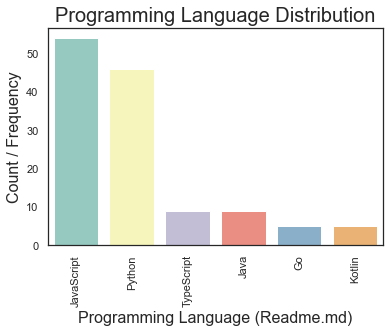

In [10]:
# Starting our exploration we quickly noticed a trend of a handful of programing languages dominating our data.
# As a result, we made the decision to focus on these main languages in an effort build a model more accurately discern between them

sns.set_theme(style="white")
ax = sns.countplot(x="language", data=train, palette="Set3",order = train['language'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Programming Language (Readme.md)', size = 16)
ax.set_ylabel('Count / Frequency', size = 16)
ax.set_title("Programming Language Distribution", size = 20)
plt.show()


### Takeaways:
 - **JavaScript & Python seem to dominate, while Java & TypeScript and all others seem to be at the 10 range.**

In [11]:
train.language.value_counts()

JavaScript    54
Python        46
TypeScript     9
Java           9
Go             5
Kotlin         5
Name: language, dtype: int64

## `Possible questions`**:**
- What are key words in all `READMEs`?
- Do words in `READMEs` vary based on `programming languages` used?
- Are there commom words in `READMEs` that all `programming languages` use?
- Do lenght of words vary in `READMEs` based on `programming languages`?

In [12]:
# Set up word counts dataframe
all_text = ' '.join(train.lemmatized)
javascript_text = ' '.join(train[train.language == 'JavaScript'].lemmatized)
python_text = ' '.join(train[train.language == 'Python'].lemmatized)
typescript_text = ' '.join(train[train.language == 'TypeScript'].lemmatized)
java_text = ' '.join(train[train.language == 'Java'].lemmatized)
go_text = ' '.join(train[train.language == 'Go'].lemmatized)
kotlin_text = ' '.join(train[train.language == 'Kotlin'].lemmatized)

In [13]:
all_freq = pd.Series(str(all_text).split()).value_counts()
javascript_freq = pd.Series(str(javascript_text).split()).value_counts()
python_freq = pd.Series(str(python_text).split()).value_counts()
typeScript_freq = pd.Series(str(typescript_text).split()).value_counts()
java_freq = pd.Series(str(java_text).split()).value_counts()
go_freq = pd.Series(str(go_text).split()).value_counts()
kotlin_freq = pd.Series(str(kotlin_text).split()).value_counts()

In [14]:
word_counts = pd.concat([all_freq, javascript_freq, python_freq, typeScript_freq,java_freq, go_freq, kotlin_freq], sort=True, axis=1)
word_counts.columns = ['all', 'JavaScript', 'python', 'typescript','java', 'go', 'kotlin']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))

In [15]:
top_30 = word_counts.sort_values(by='all', ascending=False).head(30)
top_30

,all,JavaScript,python,typescript,java,go,kotlin
bot,416,168,131,34,50,10,23
music,291,70,179,15,16,6,5
&#9;,227,76,83,44,24,0,0
song,216,60,116,10,10,8,12
musicbot,184,17,140,6,5,11,5
command,175,60,59,20,14,11,11
play,175,50,87,7,3,19,9
discord,161,74,35,20,25,5,2
text,157,7,142,1,5,1,1
option,152,5,142,0,0,4,1


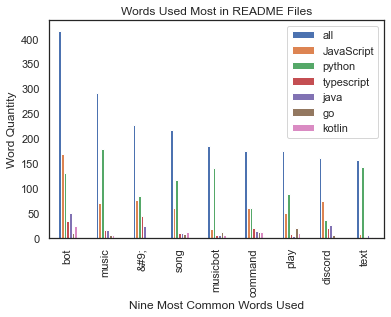

In [16]:
# Visualize word distribution
word_counts.sort_values(by='all', ascending=False)[['all', 'JavaScript', 'python', 'typescript','java', 'go', 'kotlin']].head(9).plot.bar()
plt.title('Words Used Most in README Files')
plt.style.use('seaborn-whitegrid')
plt.xlabel('Nine Most Common Words Used')
plt.ylabel('Word Quantity')
plt.show()

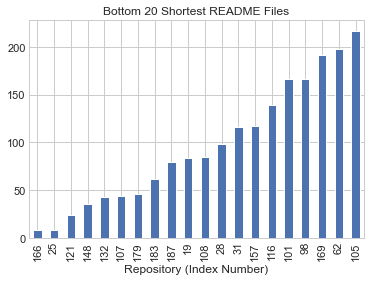

In [17]:
# min README(s)
train.lemmatized.apply(len).sort_values().head(20).plot.bar(x=train.repo)
plt.title('Bottom 20 Shortest README Files')
plt.xlabel('Repository (Index Number)')
plt.ylabel('')
plt.show()

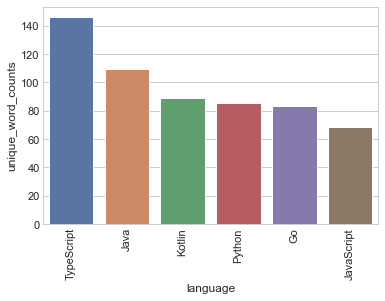

In [18]:
# Visual of the unique word counts
train['unique_word_counts'] = train.lemmatized.apply(lambda x : len(set(x.split())))

unique_train = pd.DataFrame(train.groupby('language').unique_word_counts.mean().sort_values(ascending=False)).reset_index()
unique_train.head()

ax = sns.barplot(x='language',y='unique_word_counts',data=unique_train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()